In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [4]:
df1 = pd.read_csv("SP5001.csv")
df2 = pd.read_csv("SP5002.csv")
df3 = pd.read_csv("SP5003.csv")

In [5]:
print("DF1 : ", df1.shape)
print("DF2 : ", df2.shape)
print("DF3 : ", df3.shape)

DF1 :  (15120, 7)
DF2 :  (190, 7)
DF3 :  (119, 7)


In [6]:
df = pd.concat([df1,df2,df3])

C:\Users\Rajiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
df.shape

(15429, 7)

In [8]:
df.loc[:,"Date"] = df.loc[:,"Date"].astype("datetime64")

In [9]:
df.sort_values("Date", inplace=True)

In [30]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.drop(["Adj Close", "High", "Low", "Open", "Volume"], axis=1, inplace=True)

In [ ]:
df.head()

In [15]:
df["Year"] = pd.DatetimeIndex(df['Date']).year

In [16]:
df["Month"] = pd.DatetimeIndex(df['Date']).month

In [17]:
df["Log Close"] = np.log(df["Close"])

In [18]:
df["200dayma"] = df["Close"].rolling(200).mean()

In [19]:
df.dropna(inplace=True)

In [20]:
df["Log 200dayma"] = np.log(df["200dayma"])

In [36]:
df.tail()

,Close,Date,Year,Month,Log Close,200dayma,Log 200dayma
15225,2782.000000,2018-06-11,2018,6,7.930925,2649.001007,7.881938
15226,2786.850098,2018-06-12,2018,6,7.932667,2650.740408,7.882594
15227,2775.629883,2018-06-13,2018,6,7.928633,2652.403307,7.883221
15228,2782.489990,2018-06-14,2018,6,7.931101,2654.094557,7.883859
15229,2779.419922,2018-06-15,2018,6,7.929998,2655.760156,7.884486


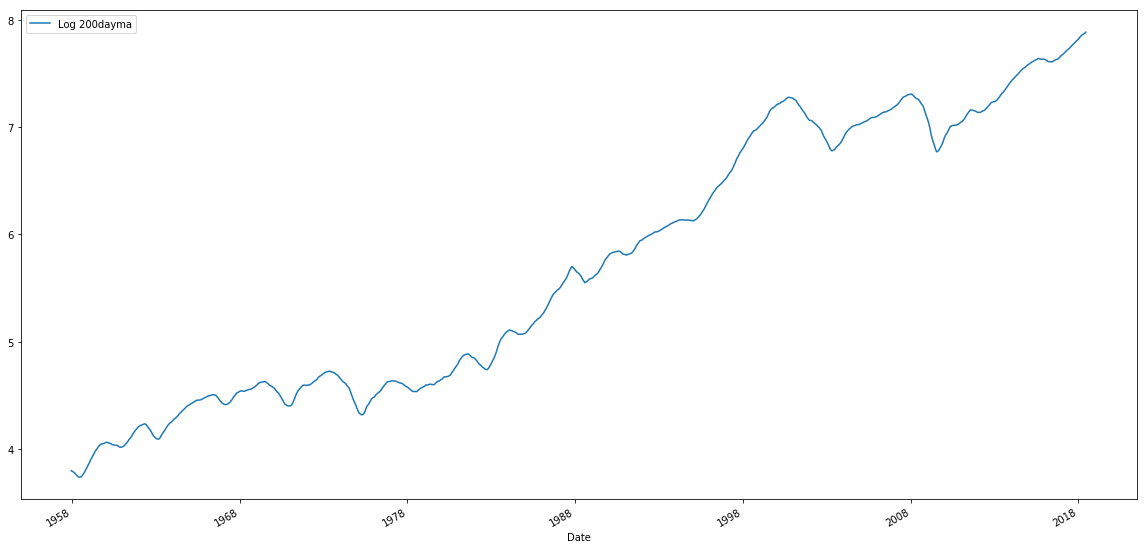

In [22]:
df.plot("Date", "Log 200dayma", figsize=(20,10))

In [28]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(data).plot()
result = sm.tsa.stattools.adfuller(data)
plt.show()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None